In [1]:
from os import getcwd
from pandas import DataFrame, read_csv, get_dummies
from scipy.stats import zscore
from matplotlib.pyplot import figure
from seaborn import set_theme,scatterplot,barplot,countplot,heatmap,violinplot,boxplot
from numpy import abs,median,around
%matplotlib inline

In [2]:
set_theme(context="notebook",style='darkgrid', palette='inferno')

In [3]:
df = read_csv(getcwd()[:getcwd().find("individual_impacts")] + "Engineering_graduate_salary.csv")

In [4]:
df = df.filter(items=["10board","12board","Salary"])

In [5]:
df["Salary"] = df["Salary"].replace([df["Salary"][(abs(zscore(df["Salary"])) > 3)]], median(df["Salary"]))

Text(0.5, 1.0, 'Scatter Plot of 10board with 12board')

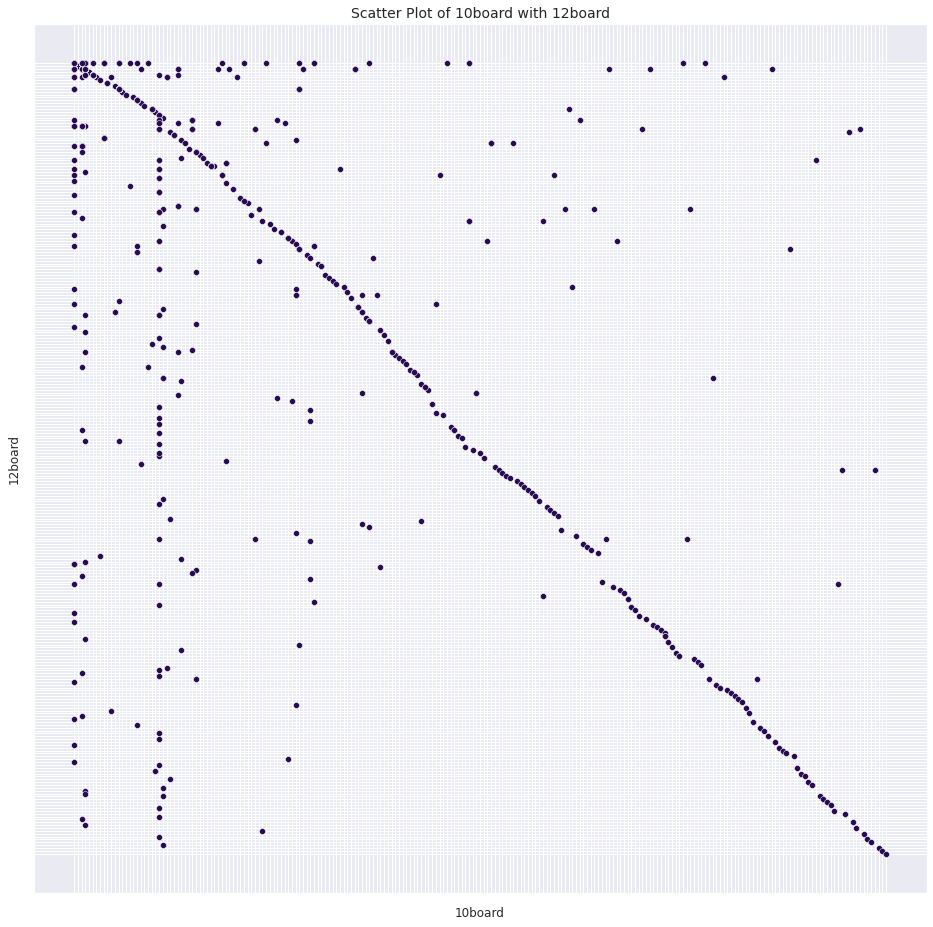

In [6]:
figure(figsize=(16,16))
plot= scatterplot(x=df["10board"],y=df["12board"])
plot.set(xticklabels=[],yticklabels=[])
plot.set_title("Scatter Plot of 10board with 12board", fontsize=14)

In [7]:
df[df["10board"] == df["12board"]].shape[0]

2371

Majority of the students opted same board in 12

For further analysis I will drop 10 board

In [8]:
df.drop(columns=["10board"], inplace=True)

Text(0.5, 1.0, 'Count Plot of 12board')

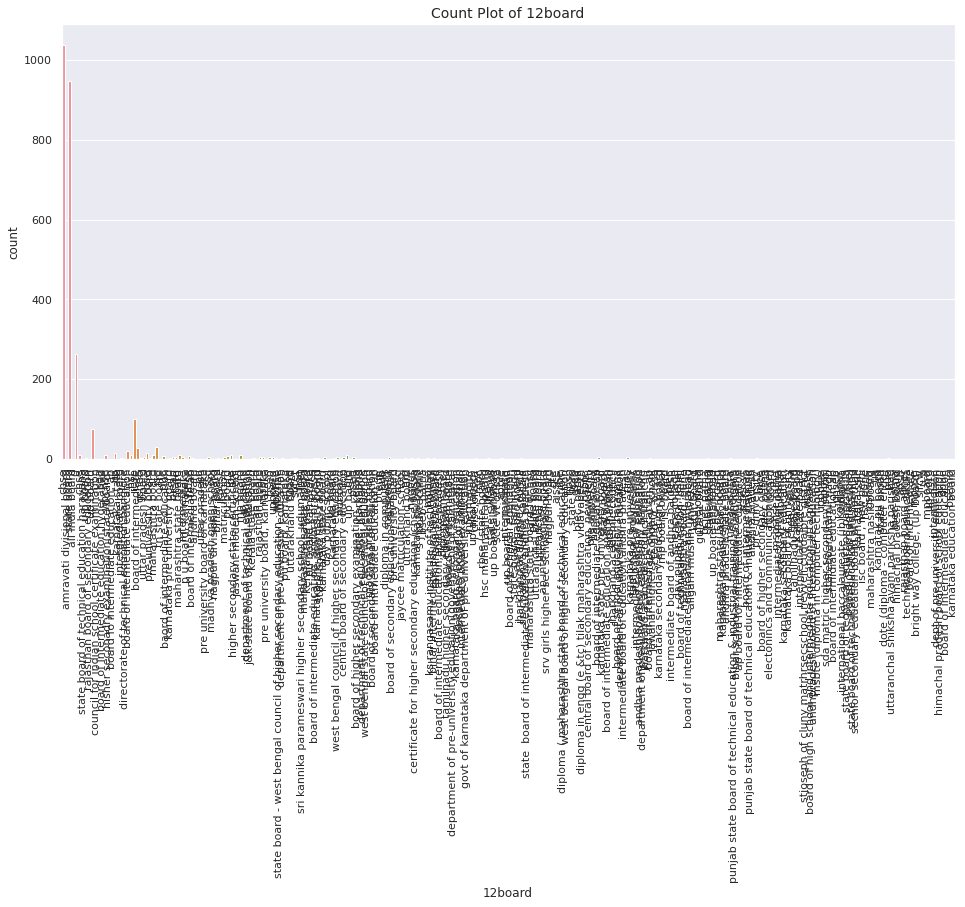

In [9]:
figure(figsize=(16,8))
plot = countplot(x=df["12board"])
plot.set_xticklabels(plot.get_xticklabels(),rotation="vertical")
plot.set_title("Count Plot of 12board", fontsize=14)

In [10]:
boards = df["12board"].value_counts()
boards

cbse                         1039
state board                   948
0                             264
icse                          101
up board                       74
                             ... 
state syllabus                  1
up board,allahabad              1
scte vt orissa                  1
intermideate                    1
karnataka education board       1
Name: 12board, Length: 277, dtype: int64

Some boards are opted by very less students in this DataFrame

So I will classify rarely opted boards as other

In [11]:
rare_boards = boards[boards <= 10]
rare_boards

maharashtra board            10
ipe                          10
bie                          10
hsc                           9
maharashtra state board       9
                             ..
state syllabus                1
up board,allahabad            1
scte vt orissa                1
intermideate                  1
karnataka education board     1
Name: 12board, Length: 265, dtype: int64

In [12]:
def remove_rare_board(value):
    if value in rare_boards:
        return 'other'
    else:
        return value
df["12board"] = df["12board"].apply(remove_rare_board)
df["12board"].value_counts()

cbse                               1039
state board                         948
other                               443
0                                   264
icse                                101
up board                             74
isc                                  29
board of intermediate                27
board of intermediate education      21
rbse                                 16
up                                   14
chse                                 11
mp board                             11
Name: 12board, dtype: int64

In [13]:
df = df[df["12board"] != '0']

Text(0.5, 1.0, 'Count Plot of 12board')

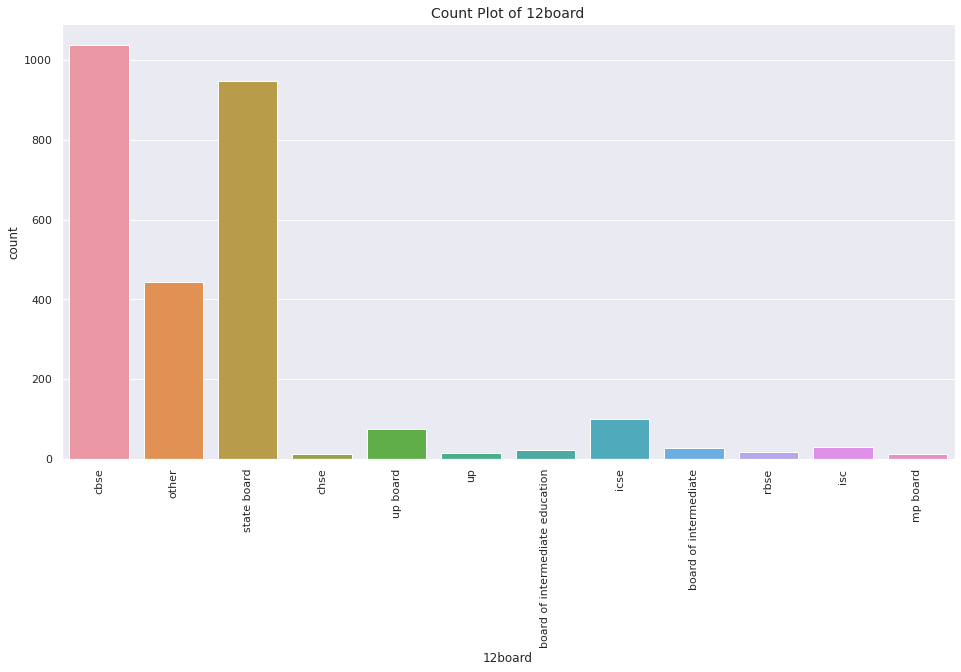

In [14]:
figure(figsize=(16,8))
plot = countplot(x=df["12board"])
plot.set_xticklabels(plot.get_xticklabels(),rotation="vertical")
plot.set_title("Count Plot of 12board", fontsize=14)

Majority of students opted CBSE board and state boards

Text(0.5, 1.0, 'Violin Plot of 12board with Salary')

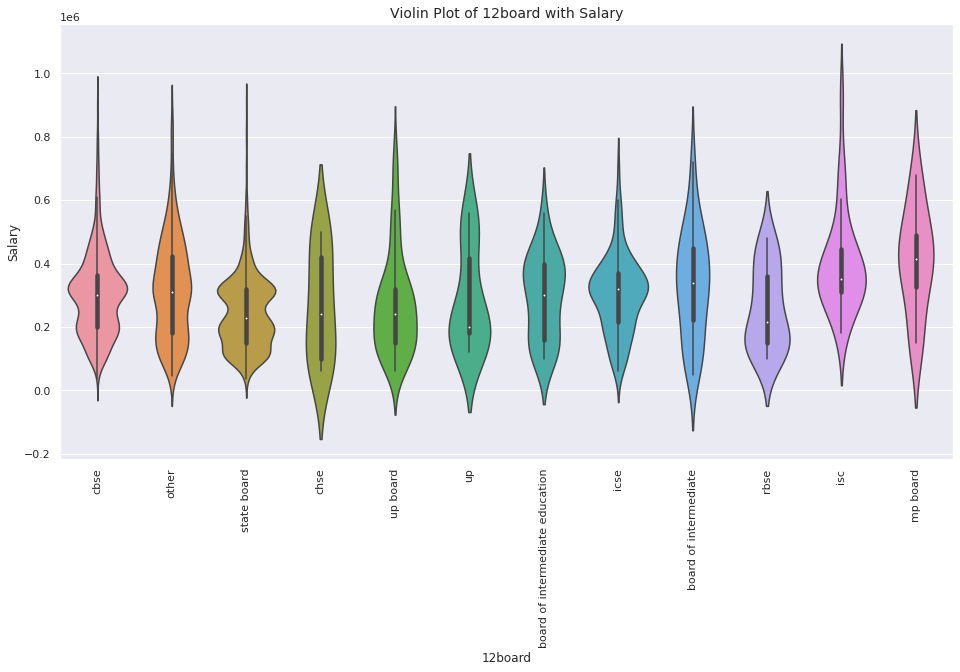

In [15]:
figure(figsize=(16,8))
plot = violinplot(x=df["12board"], y=df["Salary"])
plot.set_xticklabels(plot.get_xticklabels(),rotation="vertical")
plot.set_title("Violin Plot of 12board with Salary", fontsize=14)

Students belonging to ISC board received highest package

But averagely MP board students received higher packages

Text(0.5, 1.0, 'Box Plot of 12board with Salary')

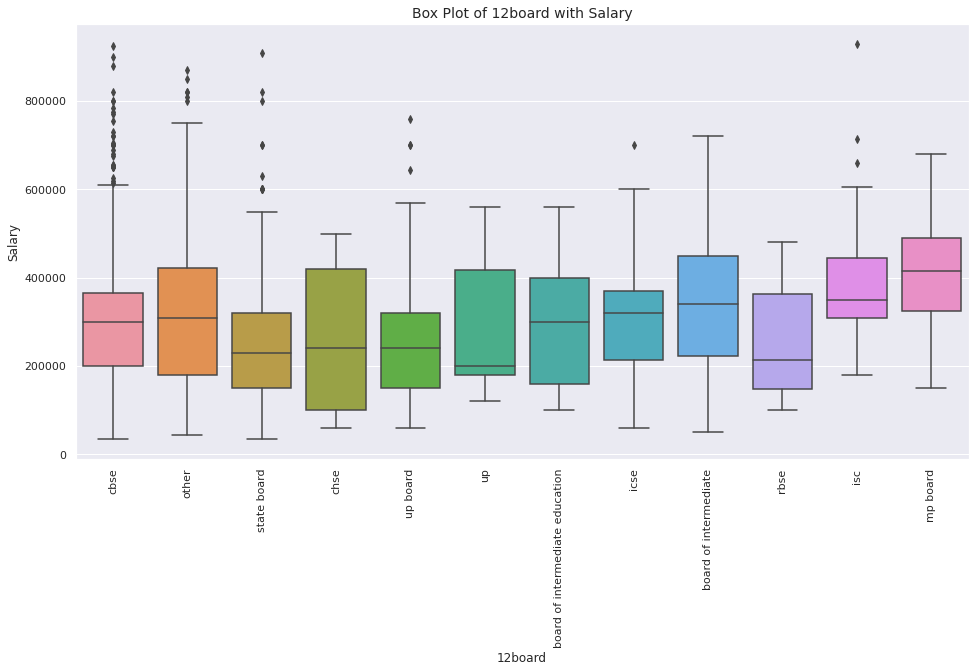

In [16]:
figure(figsize=(16,8))
plot = boxplot(x=df["12board"], y=df["Salary"])
plot.set_xticklabels(plot.get_xticklabels(),rotation="vertical")
plot.set_title("Box Plot of 12board with Salary", fontsize=14)

Text(0.5, 1.0, 'Bar Plot of 12board with Salary')

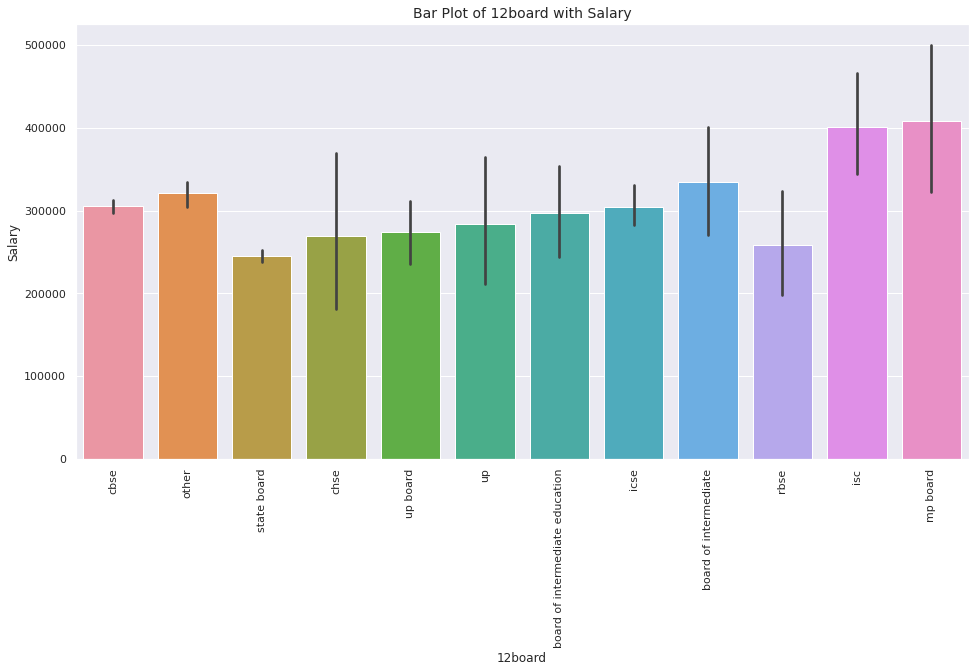

In [17]:
figure(figsize=(16,8))
plot = barplot(x=df["12board"], y=df["Salary"])
plot.set_xticklabels(plot.get_xticklabels(),rotation="vertical")
plot.set_title("Bar Plot of 12board with Salary", fontsize=14)

In [18]:
df = get_dummies(df, columns=["12board"], prefix="board")

Text(0.5, 1.0, 'Correlation Matrix')

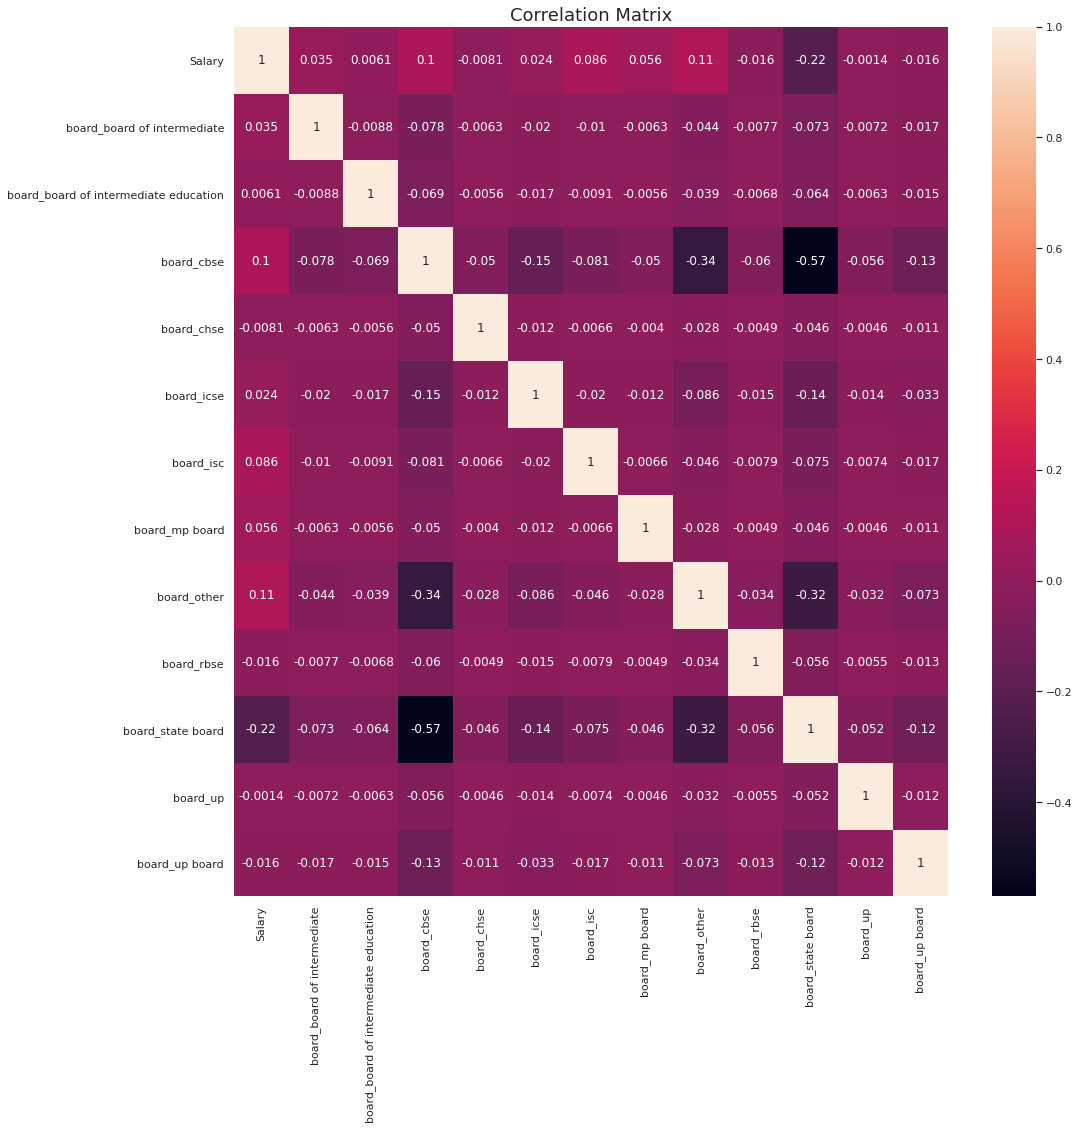

In [19]:
figure(figsize=(16,16))
plot = heatmap(df.corr(), annot=True)
plot.set_title("Correlation Matrix", fontsize=18)

In [20]:
boards = df.columns.tolist()
boards.remove('Salary')
boards

['board_board of intermediate',
 'board_board of intermediate education',
 'board_cbse',
 'board_chse',
 'board_icse',
 'board_isc',
 'board_mp board',
 'board_other',
 'board_rbse',
 'board_state board',
 'board_up',
 'board_up board']

In [21]:
corelations = {}

for board in boards:
    corelations[board] = df[board].corr(df["Salary"])

frame = DataFrame({
    "Board": corelations.keys(),
    "Corr": corelations.values()
})

frame

,Board,Corr
0,board_board of intermediate,0.034710
1,board_board of intermediate education,0.006070
2,board_cbse,0.102482
3,board_chse,-0.008074
4,board_icse,0.024339
5,board_isc,0.085992
6,board_mp board,0.056389
7,board_other,0.108119
8,board_rbse,-0.016311
9,board_state board,-0.222899


In [22]:
dic = {}

for board in boards:
    selected = df[df[board] == 1]
    
    students_in_board = selected.shape[0]

    to_3 = 0
    to_6 = 0
    to_inf = 0
    for salary in selected['Salary']:
        if (salary < 300000) :
            to_3 = to_3 + 1
        elif (salary >= 300000  and salary < 600000):
            to_6 = to_6 + 1
        else:
            to_inf = to_inf + 1
    
    dic[board] = {
        "0 to 300000": around(abs(to_3 / students_in_board), decimals=1),
        "300000 to 600000": around(abs(to_6 / students_in_board), decimals=1),
        "600000 or more": around(abs(to_inf / students_in_board), decimals=1)
        }

package_frame = DataFrame(dic)

package_frame

,board_board of intermediate,board_board of intermediate education,board_cbse,board_chse,board_icse,board_isc,board_mp board,board_other,board_rbse,board_state board,board_up,board_up board
0 to 300000,0.4,0.5,0.4,0.5,0.4,0.1,0.2,0.4,0.6,0.6,0.6,0.6
300000 to 600000,0.6,0.5,0.5,0.5,0.6,0.8,0.6,0.5,0.4,0.4,0.4,0.4
600000 or more,0.1,0.0,0.0,0.0,0.0,0.1,0.2,0.1,0.0,0.0,0.0,0.1


# From above data and analysis we can deduce 

### ***8 out of 10*** ISC board students have recieved packages between ***3 - 6 lakh***

### MP board students averagely recieved highest packages
- 2 out of 10 students recieved packages above ***6 lakh***
- 6 out of 10 students recieved packages between ***3 - 6 lakh***